## Fetching Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train[0].shape

(28, 28)

x_train[0]

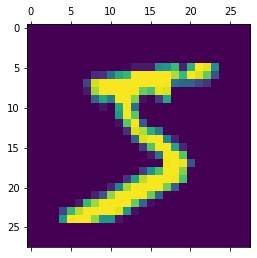

In [9]:
plt.matshow(x_train[0])

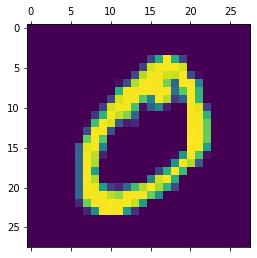

In [10]:
plt.matshow(x_train[1])

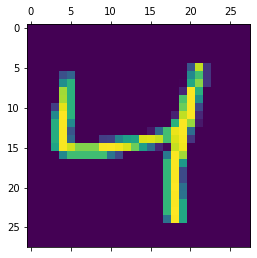

In [11]:
plt.matshow(x_train[2])

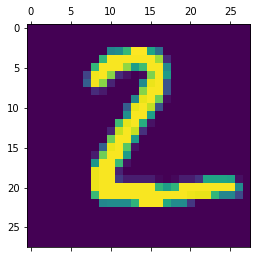

In [12]:
plt.matshow(x_test[1])

In [13]:
y_train[2]

4

In [14]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [15]:
x_train.shape

(60000, 28, 28)

In [30]:
x_train = x_train/255
x_test = x_test/255

In [31]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_train_flattened.shape

(60000, 784)

In [32]:
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_test_flattened.shape

(10000, 784)

In [33]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
model = keras.Sequential([
    (keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid'))
])
    
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4694 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9259


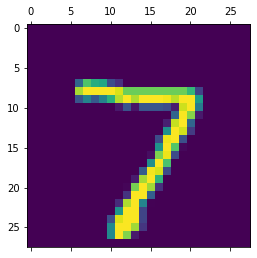

In [35]:
plt.matshow(x_test[0])

In [36]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.3899734e-02, 3.3148621e-07, 5.8798105e-02, 9.6120703e-01,
       2.3308098e-03, 7.2899669e-02, 1.3652497e-06, 9.9980879e-01,
       9.1078997e-02, 6.8297714e-01], dtype=float32)

In [37]:
np.argmax(y_predicted[0])

7

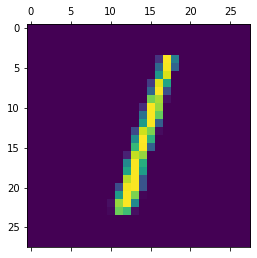

In [40]:
plt.matshow(x_test[2])

array([4.5982003e-04, 9.9337363e-01, 6.6101968e-01, 3.9238667e-01,
       2.5613755e-02, 9.7476780e-02, 2.0439273e-01, 1.5329170e-01,
       3.8796753e-01, 4.7256172e-02], dtype=float32)

In [42]:
np.argmax(y_predicted[2])

1

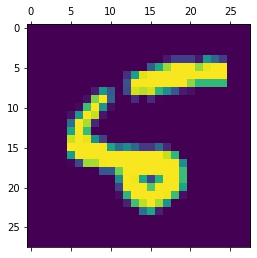

In [43]:
plt.matshow(x_test[8])

In [44]:
np.argmax(y_predicted[8])

6

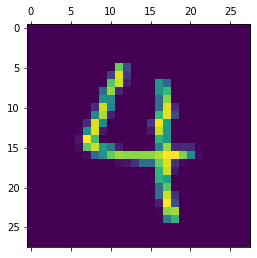

In [46]:
plt.matshow(x_test[24])

In [48]:
np.argmax(y_predicted[24])

4

In [49]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [50]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [51]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [53]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [54]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    4,    5,    3,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   7,    8,  927,   17,    8,    1,   13,   11,   37,    3],
       [   3,    0,   17,  941,    0,    9,    2,   12,   19,    7],
       [   2,    1,    2,    1,  912,    0,   11,    5,   10,   38],
       [  13,    2,    4,   50,   11,  734,   21,   10,   39,    8],
       [  13,    3,    7,    1,    7,    6,  917,    2,    2,    0],
       [   1,    5,   22,    7,    5,    0,    0,  952,    2,   34],
       [  10,    8,    5,   25,    9,   19,   10,   11,  870,    7],
       [  11,    7,    1,   12,   27,    4,    0,   25,    5,  917]])>

Text(69.0, 0.5, 'Truth')

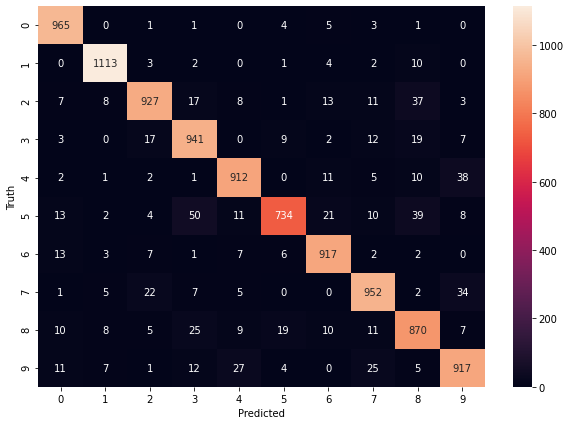

In [56]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=5 )


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2751 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1224 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0854 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9842


Text(69.0, 0.5, 'Truth')

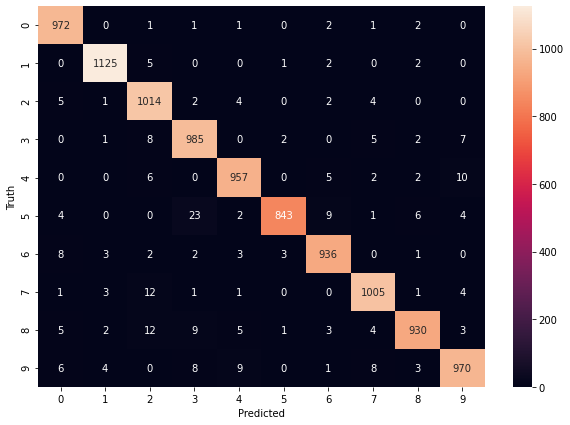

In [61]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2806 - accuracy: 0.9192
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1304 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0907 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0689 - accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0542 - accuracy: 0.9834
